# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [1]:
# .product-list-item

### What is the tag name and class name for the old price? The new price?

In [2]:
# .old-price
# .price

### What is the tag name and class name for the link to the product page?

In [3]:
# a

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [4]:
import requests
import pandas as pd
%matplotlib inline

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [5]:
url = 'http://www.hm.com/us/products/sale/men'

response = requests.post(url)
doc = BeautifulSoup(response.text, 'html.parser')

doc.find_all(class_='product-list-item')

NameError: name 'BeautifulSoup' is not defined

## URLs

### What is the URL for data about on-sale men's clothing?

In [6]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [7]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [8]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What changes about the url based on what you're looking for?

In [9]:
# &categories=…

## Request on-sale women's tops.

### How many results do you get?

In [10]:
url = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'
response = requests.get(url)
doc = response.json()['displayArticles']
len(doc)

60

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [11]:
url = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=400&page=1&deviceType=DESKTOP'
response = requests.get(url)
doc = response.json()['displayArticles']
len(doc)

362

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [12]:
tops = []

for item in doc:
    tops.append({
        'name': item['name'],
        'number': item['productNumber'],
        'old_price': item['priceInfo']['formattedOldPrice'],
        'sale_price': item['priceInfo']['formattedPrice'],
        'url': item['webUrl']
    })

df = pd.DataFrame(tops)
df.to_csv('hm_tops.csv', index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [13]:
df = pd.read_csv('hm_tops.csv')

### Convert the prices to numbers, if you haven't already

In [14]:
df['old_price'] = df['old_price'].str.replace('$', '').astype('float')
df['sale_price'] = df['sale_price'].str.replace('$', '').astype('float')

df

,name,number,old_price,sale_price,url
0,Beaded Camisole Top,47468,17.99,7.99,http://www.hm.com/us/product/47468?article=474...
1,V-neck Top,69690,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
2,V-neck Top,69690,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
3,Draped Top,61712,19.99,9.99,http://www.hm.com/us/product/61712?article=617...
4,Long-sleeved Jersey Top,64062,24.99,19.99,http://www.hm.com/us/product/64062?article=640...
5,Long-sleeved Top,56522,24.99,14.99,http://www.hm.com/us/product/56522?article=565...
6,Long-sleeved Top,56522,24.99,12.99,http://www.hm.com/us/product/56522?article=565...
7,Long-sleeved Top,56522,24.99,14.99,http://www.hm.com/us/product/56522?article=565...
8,Jersey Camisole Top,46245,4.99,3.99,http://www.hm.com/us/product/46245?article=462...
9,One-shoulder Top,49881,12.99,5.99,http://www.hm.com/us/product/49881?article=498...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [15]:
df['sale_price'].mean()

11.222403314917125

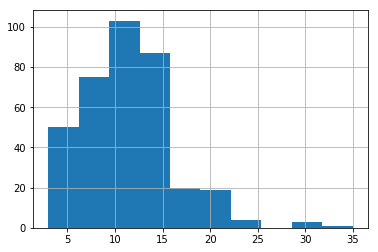

In [16]:
df['sale_price'].hist()

### What is the average discount between full price and on sale? Histogram too, please.

In [17]:
(df['old_price']-df['sale_price']).mean()

8.5986464088397785

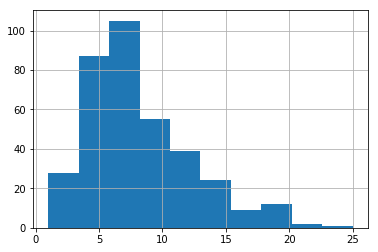

In [18]:
(df['old_price']-df['sale_price']).hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

In [19]:
(100 - df['sale_price'] / df['old_price'] * 100).mean()

42.656967287230756

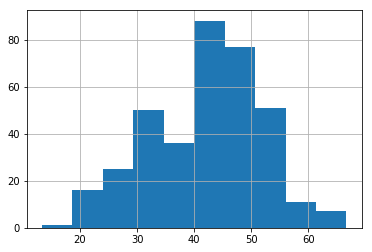

In [20]:
(100 - df['sale_price'] / df['old_price'] * 100).hist()

## Shopping the sales

### How many items are over 50% off?


In [21]:
df[(100 - df['sale_price'] / df['old_price'] * 100) > 50].shape[0]

92

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [22]:
pd.set_option('display.max_rows', 200)
df[(100 - df['sale_price'] / df['old_price'] * 100) > 50]

,name,number,old_price,sale_price,url
0,Beaded Camisole Top,47468,17.99,7.99,http://www.hm.com/us/product/47468?article=474...
1,V-neck Top,69690,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
2,V-neck Top,69690,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
3,Draped Top,61712,19.99,9.99,http://www.hm.com/us/product/61712?article=617...
9,One-shoulder Top,49881,12.99,5.99,http://www.hm.com/us/product/49881?article=498...
14,Short Lace Top,63545,29.99,14.99,http://www.hm.com/us/product/63545?article=635...
27,Long-sleeved Jersey Top,59142,29.99,14.99,http://www.hm.com/us/product/59142?article=591...
30,Jersey Top,60133,12.99,5.00,http://www.hm.com/us/product/60133?article=601...
31,Jersey Top,68934,12.99,5.99,http://www.hm.com/us/product/68934?article=689...
32,Jersey Top,44402,14.99,5.99,http://www.hm.com/us/product/44402?article=444...
